In [1]:
### What to try next
# Implement using max Pooling layers instead of conv2d Layers, 
# inspect the encoded information to see what can be done with the DATA
#Ze Hao task ^^^

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.ToTensor()

# # This will make the input from -1 to 1, apply nn.Tanh as last layer if this happens
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5), (0.5))
# ])

mnist_data = datasets.MNIST(root = './data', train = True, download = True, transform = transform)

data_loader = torch.utils.data.DataLoader(dataset = mnist_data, batch_size = 64, shuffle = True)

In [3]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        
        super().__init__()
        
        #Image size:N, 28 * 28
        #reduce this witha few linear layers
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), #reduce N, 784 > N, 128
            nn.ReLU(), 
            nn.Linear(128, 64), #(inpur, output)
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3), # Final output > N,3 , 3 output laters
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(), 
            nn.Linear(12, 64), #(inpur, output)
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28), 
            #Because the input in 0 and 1, the output should also be between 0 and 1
            #if the input image is in the range of [-1, 1], we use nn.Tanh. Might happen when we apply a normalization
            nn.Sigmoid()
        )
        
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
        


In [29]:
# CNN Usually perform much better

class Autoencoder_CNN(nn.Module):
    def __init__(self):
        
        super().__init__()
        
        #Image size:N, 28, 28
        #reduce this with a few Convolution Layers
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), # N, Output Channels: 16, size: 14*14 (reduced by half)
            nn.ReLU(), 
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # N, Output Channels: 32, size: 7*7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7), # N, Output Channels: 64, size: 1*1
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7), # N, Output Channels: 32, size: 7*7
            nn.ReLU(), 
#           nn.ConvTranspose2d(32, 16, 3),   N, Output Channels: 16, size: 13*13 (but need 14*14)
            nn.ConvTranspose2d(32, 16, 3, stride =2, padding = 1, output_padding = 1), #this compensated for the 1 missing
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride = 2, padding = 1, output_padding = 1),
            nn.Sigmoid()
        )
        
# Normally, we can use 
# nn.MaxPool2d -> nn.MaxUnpool2d
# MaxPool will reduce the size, unPool reverse, so we can use in the decoder
        

    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
# Create the new model for the CNN Autoencoder

In [33]:
model = Autoencoder()
model = Autoencoder_CNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

In [34]:
# Training for CNN Autoencoder

num_epochs = 10
outputs = []

for epoch in range(num_epochs):
    for (img, _) in data_loader:
        #Reconstructed im g, Likely going to be 
        recon  = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon)) 

Epoch:1, Loss:0.0088
Epoch:2, Loss:0.0049
Epoch:3, Loss:0.0047
Epoch:4, Loss:0.0039
Epoch:5, Loss:0.0038
Epoch:6, Loss:0.0034
Epoch:7, Loss:0.0029
Epoch:8, Loss:0.0031
Epoch:9, Loss:0.0033
Epoch:10, Loss:0.0026


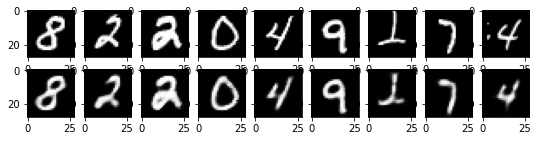

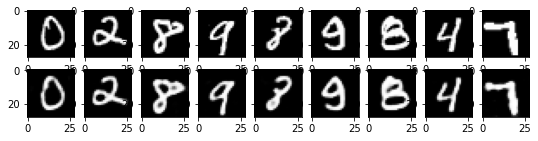

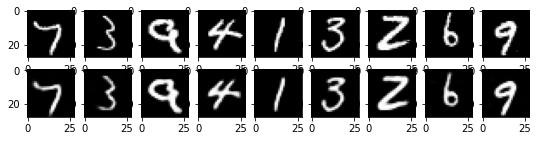

In [36]:
#Plotting the images for convolutional Autoencoder

for k in range(0, num_epochs, 4):
    plt.figure(figsize = (9,2))
    plt.gray()
    
    #because it is a Tensor, so we want to detach and then convert into a numpy array
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    
    for i, item in enumerate(imgs):
        if i >= 9:
            break
        plt.subplot(2, 9, i + 1)
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9 :
            break
        plt.subplot(2, 9, 9 + i + 1)
        plt.imshow(item[0])

In [10]:
#Training for Autoencoder

num_epochs = 10
outputs = []

for epoch in range(num_epochs):
    for (img, _) in data_loader:
        #so we reshape to make it flat
        img = img.reshape(-1, 28*28)
        
        #Reconstructed imag, Likely going to be 
        recon  = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0385
Epoch:2, Loss:0.0372
Epoch:3, Loss:0.0314
Epoch:4, Loss:0.0357
Epoch:5, Loss:0.0376
Epoch:6, Loss:0.0406
Epoch:7, Loss:0.0374
Epoch:8, Loss:0.0328
Epoch:9, Loss:0.0336
Epoch:10, Loss:0.0328


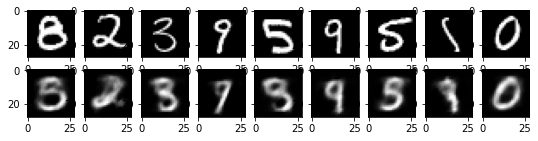

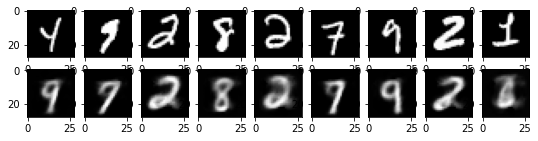

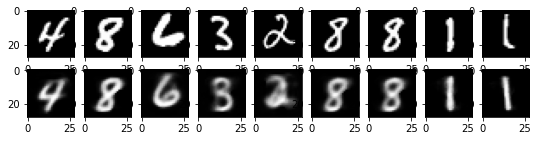

In [19]:
#Plotting the images

for k in range(0, num_epochs, 4):
    plt.figure(figsize = (9,2))
    plt.gray()
    
    #because it is a Tensor, so we want to detach and then convert into a numpy array
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    
    for i, item in enumerate(imgs):
        if i >= 9:
            break
        plt.subplot(2, 9, i + 1)
        item = item.reshape(-1, 28, 28)
        
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9 :
            break
        plt.subplot(2, 9, 9 + i + 1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])